In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/compas-scores-two-years.csv'
df = pd.read_csv(url)

In [23]:
df

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,...,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0


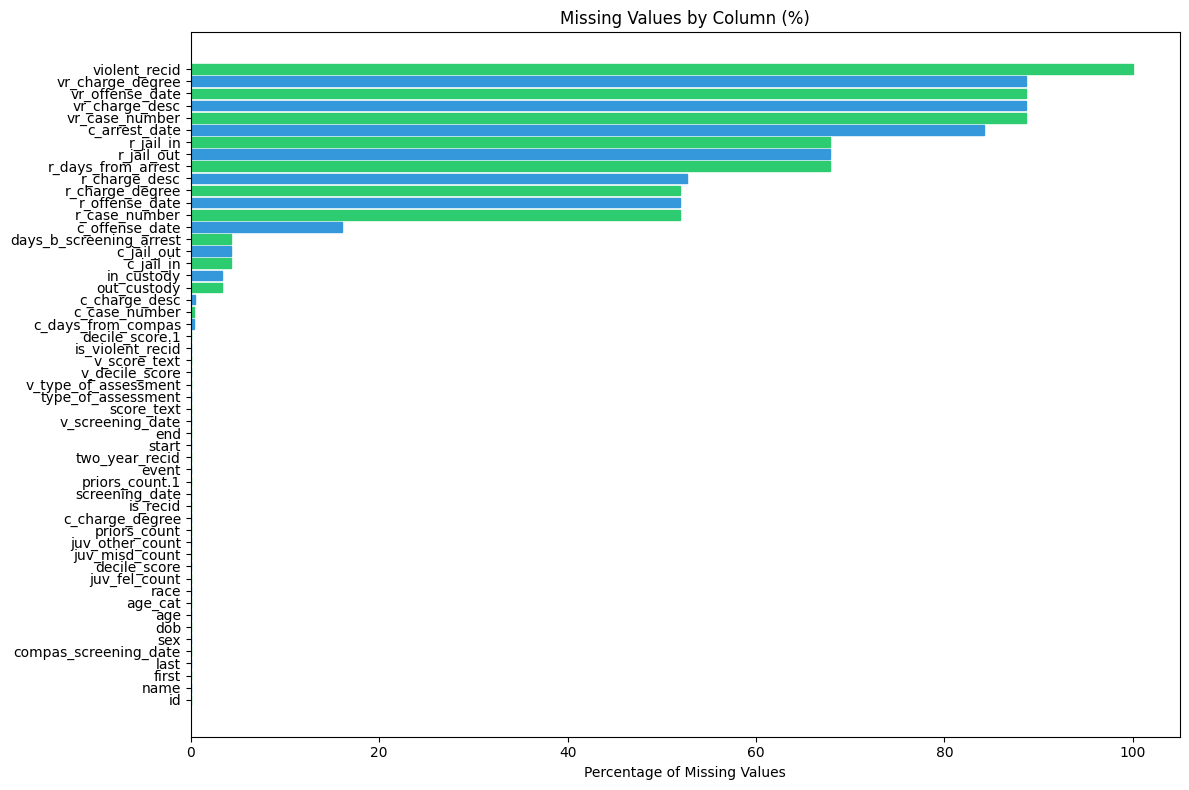

In [24]:
# Calculate missing values as percentages
missing_values = (df.isnull().sum() / len(df) * 100).sort_values(ascending=True)

plt.figure(figsize=(12, 8))

bars = plt.barh(range(len(missing_values)), missing_values)

colors = ['#2ecc71', '#3498db']
for i, bar in enumerate(bars):
    bar.set_color(colors[i % 2])

plt.yticks(range(len(missing_values)), missing_values.index)
plt.xlabel('Percentage of Missing Values')
plt.title('Missing Values by Column (%)')

plt.tight_layout()

plt.show()


#### Menunjukkan berapa persen data yang missing (kosong) di setiap fitur

In [25]:
# Drop columns with missing values above 0.2%
columns_to_drop = missing_values[missing_values > 0.2].index
df = df.drop(columns=columns_to_drop)

#### Data yang ada missing di drop, karena jika dilihat datanya tidak relevan untuk dijadikan parameter (tanggal, deskripsi, number, dll), atau datanya terlalu banyak missing

In [26]:
df


,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,2013-08-14,Risk of Violence,1,Low,2013-08-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,2013-01-27,Risk of Violence,1,Low,2013-01-27,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,2013-04-14,Risk of Violence,3,Low,2013-04-14,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,2013-01-13,Risk of Violence,6,Medium,2013-01-13,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,2013-03-26,Risk of Violence,1,Low,2013-03-26,2,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,2013-11-23,Risk of Violence,5,Medium,2013-11-23,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,2014-02-01,Risk of Violence,5,Medium,2014-02-01,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,2014-01-14,Risk of Violence,1,Low,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,...,2014-03-09,Risk of Violence,2,Low,2014-03-09,3,0,754,0,0


In [27]:
df = df.drop(columns=['id', 'name', 'first', 'last', 'compas_screening_date', 'dob', 'screening_date', 'v_screening_date', 'type_of_assessment', 'v_type_of_assessment', 'decile_score.1', 'priors_count.1', 'is_recid'])


#### Data tanggal, nama, id, didrop, 
#### is_recid juga didrop karena hampir mirip dengan two_year_recid yang akan diprediksi, mencegah overfitting

In [28]:
df

,sex,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,c_charge_degree,is_violent_recid,score_text,v_decile_score,v_score_text,start,end,event,two_year_recid
0,Male,69,Greater than 45,Other,0,1,0,0,0,F,0,Low,1,Low,0,327,0,0
1,Male,34,25 - 45,African-American,0,3,0,0,0,F,1,Low,1,Low,9,159,1,1
2,Male,24,Less than 25,African-American,0,4,0,1,4,F,0,Low,3,Low,0,63,0,1
3,Male,23,Less than 25,African-American,0,8,1,0,1,F,0,High,6,Medium,0,1174,0,0
4,Male,43,25 - 45,Other,0,1,0,0,2,F,0,Low,1,Low,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,Male,23,Less than 25,African-American,0,7,0,0,0,F,0,Medium,5,Medium,1,860,0,0
7210,Male,23,Less than 25,African-American,0,3,0,0,0,F,0,Low,5,Medium,1,790,0,0
7211,Male,57,Greater than 45,Other,0,1,0,0,0,F,0,Low,1,Low,0,808,0,0
7212,Female,33,25 - 45,African-American,0,2,0,0,3,M,0,Low,2,Low,0,754,0,0


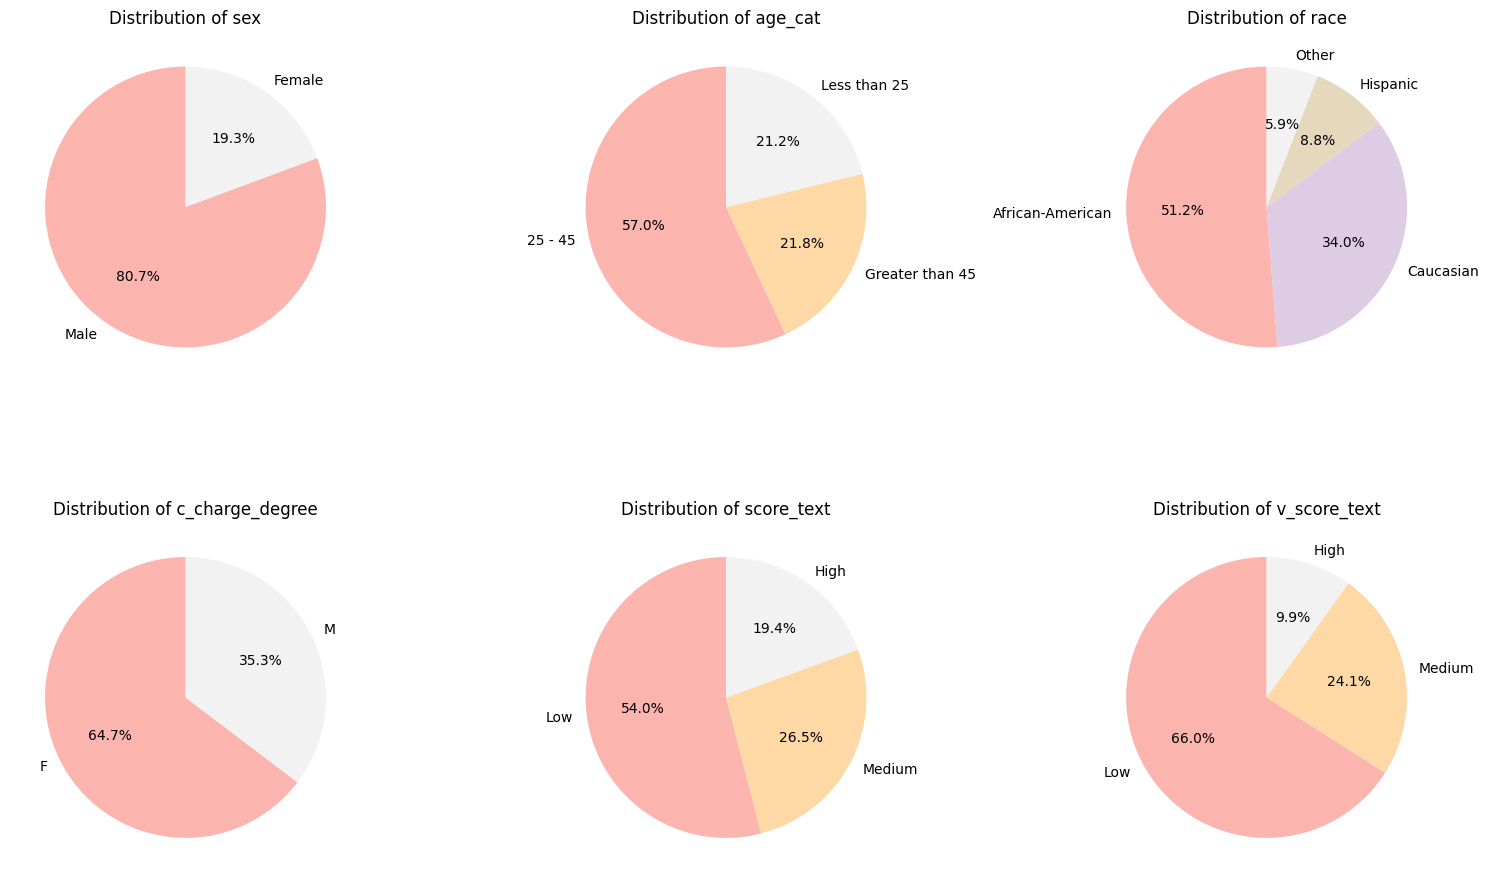

In [29]:
object_columns = df.select_dtypes(include=['object']).columns

n_cols = 3
n_rows = (len(object_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5*n_rows))

for i, col in enumerate(object_columns):
    plt.subplot(n_rows, n_cols, i+1)
    
    value_counts = df[col].value_counts()
    
    mask = value_counts/value_counts.sum() < 0.07
    if mask.any():
        other = value_counts[mask].sum()
        value_counts = value_counts[~mask]
        value_counts['Other'] = other
    
    plt.pie(value_counts,
            labels=value_counts.index, 
            autopct='%1.1f%%',
            startangle=90,
            colors=plt.cm.Pastel1(np.linspace(0, 1, len(value_counts))))
    
    plt.title(f'Distribution of {col}')

plt.tight_layout()

plt.show()


#### Di atas visualisasi seluruh data object/categorical. Nantinya data akan diubah dengan labeling menjadi angka sesuai hubungan valuenya/ordinalitas

In [30]:
print("\nColumns in dataframe:")
for col in df.columns:
    print(f"- {col}")



Columns in dataframe:
- sex
- age
- age_cat
- race
- juv_fel_count
- decile_score
- juv_misd_count
- juv_other_count
- priors_count
- c_charge_degree
- is_violent_recid
- score_text
- v_decile_score
- v_score_text
- start
- end
- event
- two_year_recid


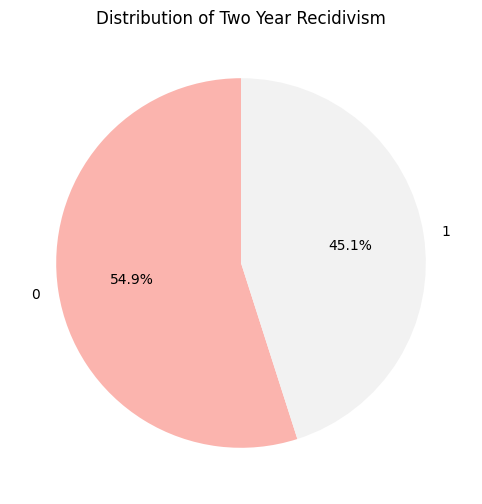

In [31]:
df['two_year_recid'] = df['two_year_recid'].astype('category')
df['event'] = df['event'].astype('category')
df['is_violent_recid'] = df['is_violent_recid'].astype('category')

plt.figure(figsize=(10, 6))

recid_counts = df['two_year_recid'].value_counts()

plt.pie(recid_counts, 
        labels=recid_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Pastel1(np.linspace(0, 1, len(recid_counts))))

plt.title('Distribution of Two Year Recidivism')
plt.show()


#### Di atas mengubah fitur yang berisi kelas namun dianggap angka (numerical) menjadi categorical. Contoh fitur yang nilainya hanya 0 dan 1 awalnya dianggap numeric, lalu diubah menjadi categorical
#### Di atas juga ada visualisasi fitur yang akan dijadikan target. Pembagian kelas 0 dan 1 hampir seimbang.

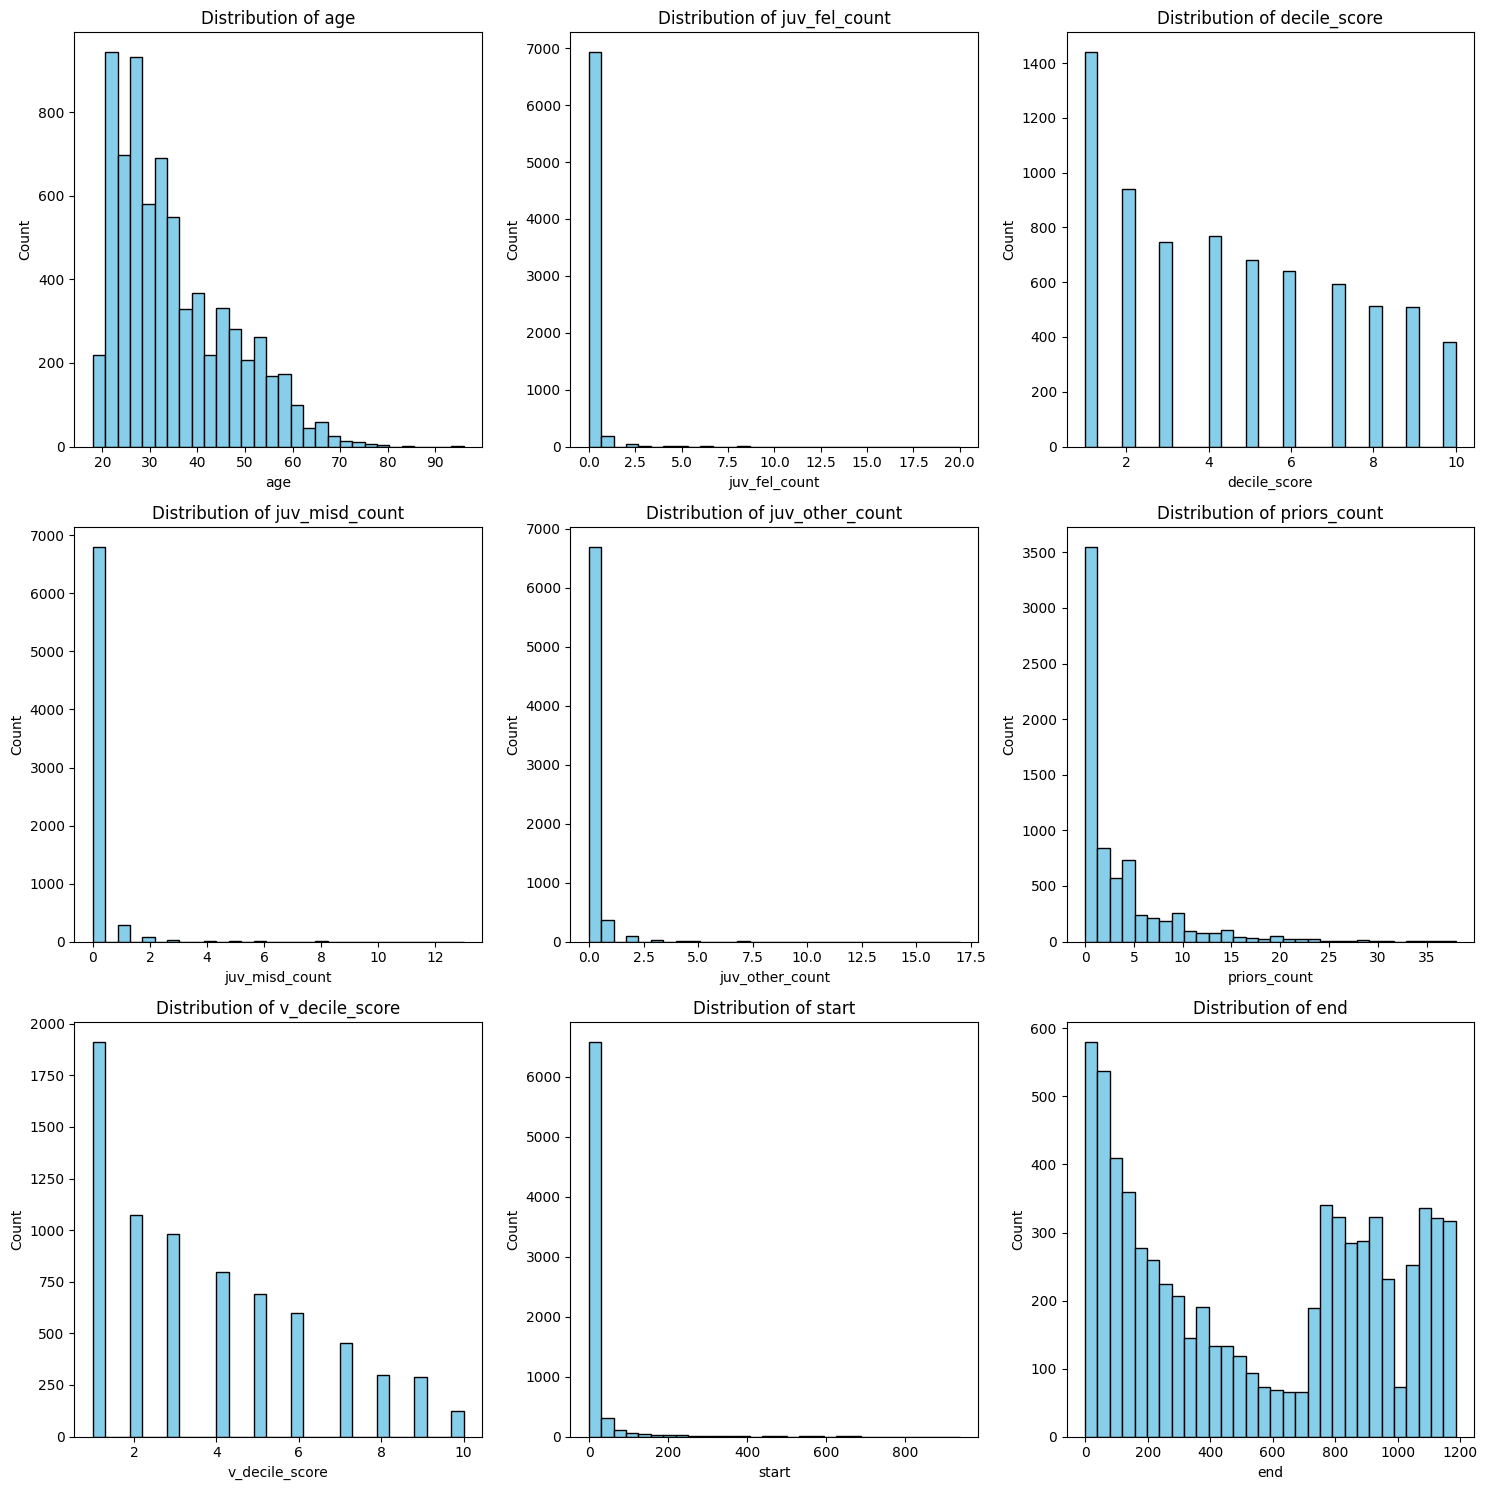

In [32]:
# Get numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

n_cols = len(numerical_cols)
n_rows = (n_cols + 2) // 3  
plt.figure(figsize=(15, 5*n_rows))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, 3, i)
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


#### Di atas visualiasi seluruh fitur numerical

In [33]:
# Binary encoding for sex and c_charge_degree
df['sex'] = (df['sex'] == 'Male').astype(int)
df['c_charge_degree'] = (df['c_charge_degree'] == 'F').astype(int)

# One hot encoding for race
race_dummies = pd.get_dummies(df['race'], prefix='race')
df = pd.concat([df.drop('race', axis=1), race_dummies], axis=1)


In [34]:
# Label encoding for score_text and v_score_text
score_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['score_text'] = df['score_text'].map(score_mapping)
df['v_score_text'] = df['v_score_text'].map(score_mapping)

# Label encoding for age_cat
age_mapping = {'Less than 25': 1, '25 - 45': 2, 'Greater than 45': 3}
df['age_cat'] = df['age_cat'].map(age_mapping)


#### Encoding data object ke angka, untuk data yang non-ordinal menggunakan one-hot, untuk data yang ordinal menggunakan labeling manual dengan urut

In [35]:
df

,sex,age,age_cat,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,c_charge_degree,is_violent_recid,...,start,end,event,two_year_recid,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other
0,1,69,3,0,1,0,0,0,1,0,...,0,327,0,0,False,False,False,False,False,True
1,1,34,2,0,3,0,0,0,1,1,...,9,159,1,1,True,False,False,False,False,False
2,1,24,1,0,4,0,1,4,1,0,...,0,63,0,1,True,False,False,False,False,False
3,1,23,1,0,8,1,0,1,1,0,...,0,1174,0,0,True,False,False,False,False,False
4,1,43,2,0,1,0,0,2,1,0,...,0,1102,0,0,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,1,23,1,0,7,0,0,0,1,0,...,1,860,0,0,True,False,False,False,False,False
7210,1,23,1,0,3,0,0,0,1,0,...,1,790,0,0,True,False,False,False,False,False
7211,1,57,3,0,1,0,0,0,1,0,...,0,808,0,0,False,False,False,False,False,True
7212,0,33,2,0,2,0,0,3,0,0,...,0,754,0,0,True,False,False,False,False,False


In [36]:
df.dtypes

sex                         int64
age                         int64
age_cat                     int64
juv_fel_count               int64
decile_score                int64
juv_misd_count              int64
juv_other_count             int64
priors_count                int64
c_charge_degree             int64
is_violent_recid         category
score_text                  int64
v_decile_score              int64
v_score_text                int64
start                       int64
end                         int64
event                    category
two_year_recid           category
race_African-American        bool
race_Asian                   bool
race_Caucasian               bool
race_Hispanic                bool
race_Native American         bool
race_Other                   bool
dtype: object

#### Tipe data sudah sesuai untuk dimasukkan ke model klasifikasi

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [38]:
X = df.drop('two_year_recid', axis=1)
y = df['two_year_recid']

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# predict
y_pred = clf.predict(X_test)


Accuracy: 0.924
Precision: 0.911
Recall: 0.911
F1 Score: 0.911
ROC AUC Score: 0.922


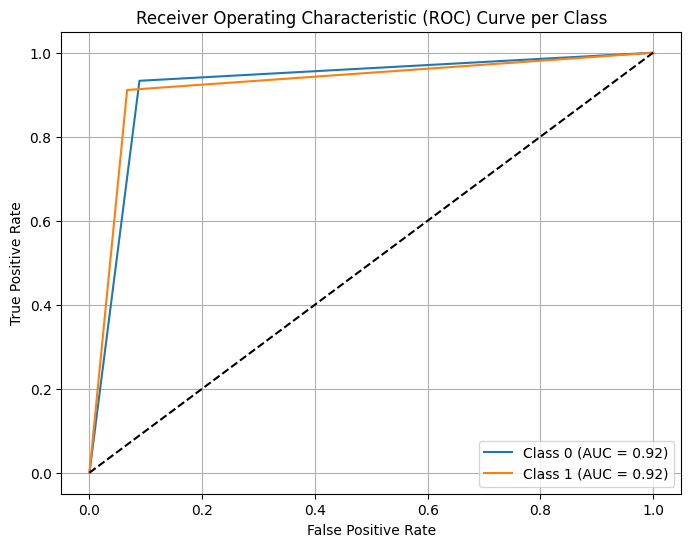

In [39]:
# Evaluate accuracy, precision, recall, f1 score, roc auc curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')
print(f'ROC AUC Score: {roc_auc:.3f}')

classes = np.unique(y)
plt.figure(figsize=(8, 6))

for i in classes:
    y_test_bin = (y_test == i)
    y_score = clf.predict_proba(X_test)[:, i]
    
    fpr, tpr, _ = roc_curve(y_test_bin, y_score)
    roc_auc = roc_auc_score(y_test_bin, y_score)
    
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve per Class')
plt.legend()
plt.grid(True)
plt.show()


### Hasil
#### Setiap metrik evaluasi klasifikasi (accuracy, precision, recall , f1, ROC) sudah bernilai cukup baik, yang berarti model dapat mengklasifikasi dengan baik.

## Decision Tree Classifier
 
 Decision tree classifier membuat model berbentuk pohon keputusan untuk klasifikasi berdasarkan fitur-fitur yang ada. Algoritma ini membagi data ke dalam subset berdasarkan ambang batas fitur yang memaksimalkan information gain atau meminimalkan impurity (seperti Gini impurity atau entropy) dalam setiap subset.
 
 Pada setiap node, kriteria pemisahan menggunakan Gini impurity:
 
 $Gini = 1 - \sum_{i=1}^{c} (p_i)^2$
 
 di mana $p_i$ adalah proporsi kelas i dalam node tersebut dan c adalah jumlah kelas.
 
 Prediksi akhir untuk leaf node adalah kelas mayoritas dari data pelatihan dalam node tersebut:
 
 $\hat{y} = \text{mode}(\{y_i : i \in \text{leaf}\})$


## Accuracy
Proporsi prediksi yang benar dari total prediksi:

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

di mana:
- TP (True Positive): kasus positif yang diprediksi benar sebagai positif
- TN (True Negative): kasus negatif yang diprediksi benar sebagai negatif  
- FP (False Positive): kasus negatif yang salah diprediksi sebagai positif
- FN (False Negative): kasus positif yang salah diprediksi sebagai negatif

## Precision
Proporsi prediksi positif yang benar:

$Precision = \frac{TP}{TP + FP}$

## Recall
Proporsi kasus positif aktual yang diprediksi benar:

$Recall = \frac{TP}{TP + FN}$

## F1 Score
Rata-rata harmonik dari precision dan recall:

$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$

## ROC (Receiver Operating Characteristic) Curve
Kurva yang menunjukkan trade-off antara True Positive Rate (TPR/Recall) dan False Positive Rate (FPR):

$TPR = \frac{TP}{TP + FN}$

$FPR = \frac{FP}{FP + TN}$

## AUC-ROC Score
Area Under the ROC Curve - mengukur kemampuan model untuk membedakan kelas. Nilai 1.0 berarti klasifikasi sempurna, 0.5 berarti klasifikasi acak.
